In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import (confusion_matrix,accuracy_score)  
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
students_raw = pd.read_csv('data.csv')
students_raw

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [3]:
students_raw.shape

(480, 17)

In [4]:
# Columns of the dataset
students_raw.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [5]:
# Information
students_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [6]:
# Description of the dataset
students_raw.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [7]:
# Checking for missing values
students_raw.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [8]:
# Checking for duplicate values
duplicate = students_raw[students_raw.duplicated()] 
duplicate

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,L
327,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,L


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


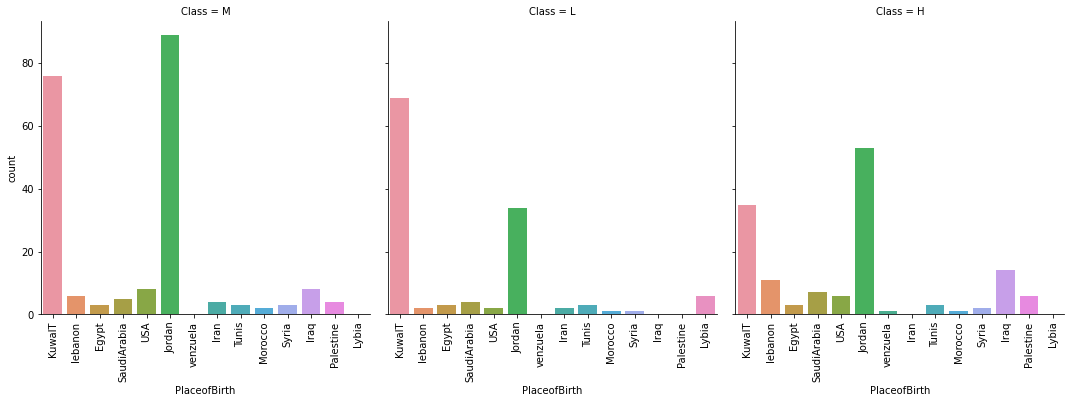

In [9]:
chart = sns.factorplot('PlaceofBirth', col = 'Class', data=students_raw, kind='count')
chart.set_xticklabels( rotation=90)

In [10]:
categorical = [var for var in students_raw.columns if students_raw[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 13 categorical variables

The categorical variables are : ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


In [11]:
#To know the frequency of categorical variables
for var in categorical: 
    print(students_raw[var].value_counts())

M    305
F    175
Name: gender, dtype: int64
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
A    283
B    167
C     30
Name: SectionID, dtype: int64
IT           95
French       65
Arabic       59
Science      51
E

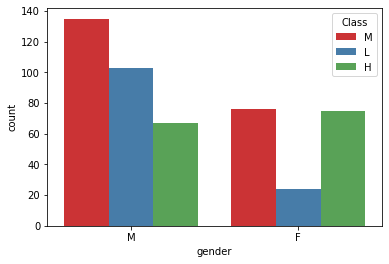

In [12]:
sns.countplot(data = students_raw,x='gender',hue='Class',palette='Set1')

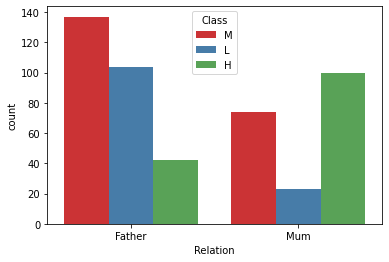

In [13]:
# relation between the grade of the student and parent responsible

sns.countplot(data=students_raw,x='Relation',hue='Class',palette='Set1');

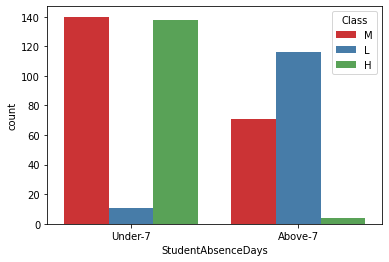

In [14]:
sns.countplot(data=students_raw,x='StudentAbsenceDays',hue='Class',palette='Set1');

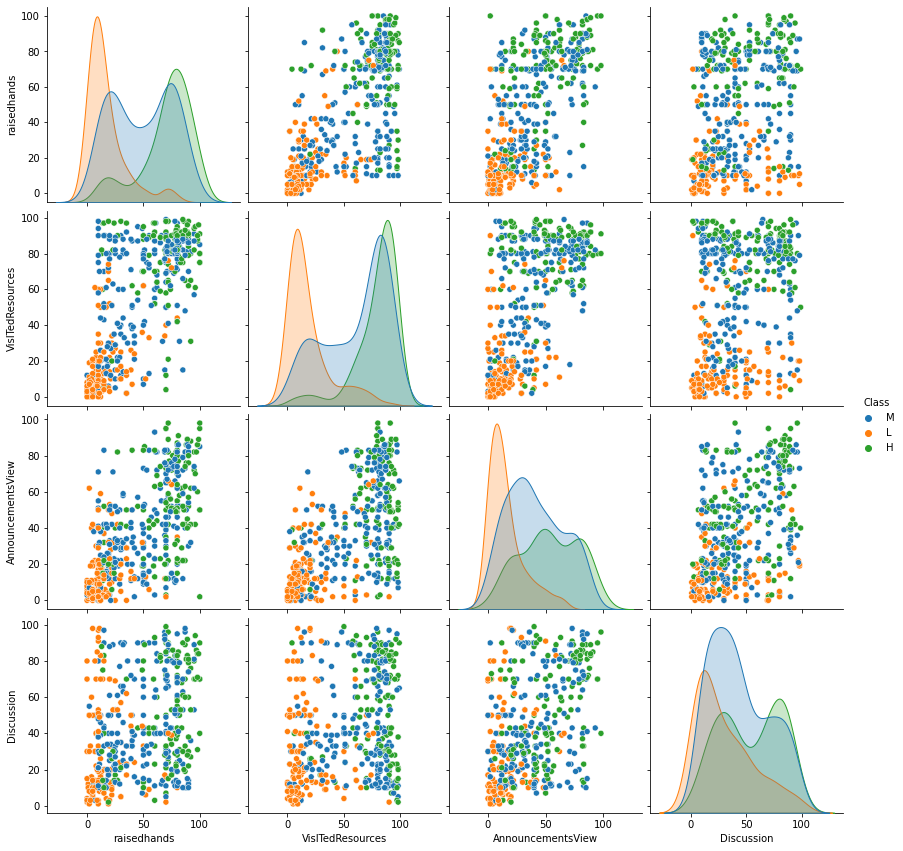

In [15]:
# Levels of participation rates across classes of students
# discussion group participation across classes

sns.pairplot(students_raw,hue='Class',height=3);

In [17]:
fig = px.scatter_matrix(students_raw,dimensions=["AnnouncementsView","VisITedResources","raisedhands","Discussion"],color = 'GradeID',title = 'Student Data')
fig.update_layout(template='ggplot2')
fig.show()

In [18]:
stud = pd.read_csv('data.csv')

In [19]:
def cleanstage(x):
    if x=='lowerlevel' or x=='L':
        return 0
    elif x=="MiddleSchool"or x=='M':
        return 1
    else:
        return 2
stud.StageID = stud.StageID.apply(lambda y:cleanstage(y))
stud['gender'] = stud.gender.apply(lambda x: 0 if x=='M' else 1)
stud.ParentschoolSatisfaction = stud.ParentschoolSatisfaction.apply(lambda x: 1 if x=='Good' else 0)
stud.StudentAbsenceDays = stud.StudentAbsenceDays.apply(lambda x: 0 if x=="Under-7" else 1)
stud.Semester = stud.Semester.apply(lambda x: 0 if x=='F' else 1)# 0=F - 1=S
stud.GradeID = stud.GradeID.apply(lambda x: int(x[2:]))
stud.Relation = stud.Relation.apply(lambda x: 0 if x=='Father' else 1)
stud.ParentAnsweringSurvey = stud.ParentAnsweringSurvey.apply(lambda x: 1 if x=='Yes' else 0)
stud.Class = stud.Class.apply(lambda x:cleanstage(x))
stud

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,0,4,A,IT,0,0,15,16,2,20,1,1,0,1
1,0,KW,KuwaIT,0,4,A,IT,0,0,20,20,3,25,1,1,0,1
2,0,KW,KuwaIT,0,4,A,IT,0,0,10,7,0,30,0,0,1,0
3,0,KW,KuwaIT,0,4,A,IT,0,0,30,25,5,35,0,0,1,0
4,0,KW,KuwaIT,0,4,A,IT,0,0,40,50,12,50,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,Jordan,Jordan,1,8,A,Chemistry,1,0,5,4,5,8,0,0,1,0
476,1,Jordan,Jordan,1,8,A,Geology,0,0,50,77,14,28,0,0,0,1
477,1,Jordan,Jordan,1,8,A,Geology,1,0,55,74,25,29,0,0,0,1
478,1,Jordan,Jordan,1,8,A,History,0,0,30,17,14,57,0,0,1,0


In [21]:
corr = stud.corr()
#corr.style.background_gradient(cmap='RdYlGn').set_precision(2)

In [23]:
corr

,gender,StageID,GradeID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.000000,-0.017793,-0.018304,-0.049156,0.195142,0.149978,0.210932,0.052139,0.124703,0.022359,0.093478,-0.209011,0.263490
StageID,-0.017793,1.000000,0.951452,0.029512,-0.034205,0.172751,0.068621,0.163666,0.161406,0.114025,-0.014272,-0.112536,0.083997
GradeID,-0.018304,0.951452,1.000000,0.076370,-0.034626,0.194382,0.078741,0.198552,0.180966,0.116915,-0.018349,-0.084896,0.071654
Semester,-0.049156,0.029512,0.076370,1.000000,0.148705,0.178358,0.173219,0.287066,0.019083,0.023628,-0.025258,-0.072462,0.126239
Relation,0.195142,-0.034205,-0.034626,0.148705,1.000000,0.364237,0.360240,0.339505,0.026720,0.163811,0.287698,-0.219687,0.401142
raisedhands,0.149978,0.172751,0.194382,0.178358,0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,-0.463882,0.646298
VisITedResources,0.210932,0.068621,0.078741,0.173219,0.360240,0.691572,1.000000,0.594500,0.243292,0.382472,0.363835,-0.499030,0.677094
AnnouncementsView,0.052139,0.163666,0.198552,0.287066,0.339505,0.643918,0.594500,1.000000,0.417290,0.396357,0.298744,-0.312134,0.527370
Discussion,0.124703,0.161406,0.180966,0.019083,0.026720,0.339386,0.243292,0.417290,1.000000,0.232197,0.061104,-0.218778,0.308183
ParentAnsweringSurvey,0.022359,0.114025,0.116915,0.023628,0.163811,0.316570,0.382472,0.396357,0.232197,1.000000,0.539875,-0.261152,0.435495


**logistic regression**

In [24]:
x = stud[['raisedhands']]
y = stud['Semester']
x = sm.add_constant(x)
model1 = sm.Logit(y, x, missing='drop')
res = model1.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.676896
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Semester   No. Observations:                  480
Model:                          Logit   Df Residuals:                      478
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 0.02314
Time:                        05:22:15   Log-Likelihood:                -324.91
converged:                       True   LL-Null:                       -332.61
Covariance Type:            nonrobust   LLR p-value:                 8.733e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5946      0.170     -3.489      0.000      -0.929      -0.261
raisedhands     0.0118    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [25]:
y1 = res.predict(x)
prediction = list(map(round, y1))
print('Acutal values', list(y.values))
print('Predictions :', prediction)

Acutal values [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0

In [26]:
# confusion matrix
cm = confusion_matrix(y, prediction) 
print ("Confusion Matrix : \n", cm)  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y, prediction))

Confusion Matrix : 
 [[151  94]
 [103 132]]
Test accuracy =  0.5895833333333333


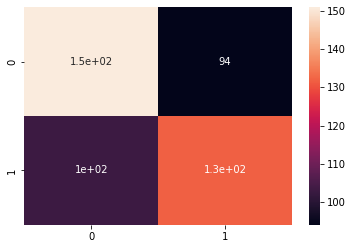

In [28]:
#confusion_matrix = pd.crosstab(y, prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [36]:
Report = classification_report(y,prediction)

In [37]:
print(Report)

              precision    recall  f1-score   support

           0       0.59      0.62      0.61       245
           1       0.58      0.56      0.57       235

    accuracy                           0.59       480
   macro avg       0.59      0.59      0.59       480
weighted avg       0.59      0.59      0.59       480



In [38]:
# Mutiple Logistic Regression

# Making a new dataframe consisting of attributes considered for the regression model.
stud_df = students_raw[["raisedhands", "VisITedResources", "Discussion", "ParentschoolSatisfaction"]]
stud_df["ParentschoolSatisfaction"] = stud_df.ParentschoolSatisfaction.apply(lambda x: 0 if x == "Bad" else 1)
print(stud_df)

# dividing the dataset into testing data(25%) and training data(75%)
X = stud_df[["raisedhands", "VisITedResources", "Discussion"]]
y = stud_df["ParentschoolSatisfaction"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Fitting a logistic regression for the training data and predicting the values for the testing dataset
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

     raisedhands  VisITedResources  Discussion  ParentschoolSatisfaction
0             15                16          20                         1
1             20                20          25                         1
2             10                 7          30                         0
3             30                25          35                         0
4             40                50          50                         0
..           ...               ...         ...                       ...
475            5                 4           8                         0
476           50                77          28                         0
477           55                74          29                         0
478           30                17          57                         0
479           35                14          62                         0

[480 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
print("Logistic regression coefficients: ", logistic_regression.coef_)
print("Logistic regression intercept: ",logistic_regression.intercept_)

Logistic regression coefficients:  [[ 0.00366796  0.02323692 -0.00346247]]
Logistic regression intercept:  [-0.88739625]


In [40]:
# 0 - bad, 1 - good
logistic_regression.classes_

array([0, 1])

In [41]:
# View of the testing data set to compare the actual vs predicted values
y_test_array = y_test.to_numpy()
result = X_test
result["Actual_Parent_school_satisfaction"] = y_test_array
result["Predicted_Parent_school_satisfaction"] = y_pred
result

,raisedhands,VisITedResources,Discussion,Actual_Parent_school_satisfaction,Predicted_Parent_school_satisfaction
15,30,40,66,1,0
124,0,6,15,0,0
141,19,65,10,0,1
263,49,94,7,0,1
170,40,62,33,1,1
...,...,...,...,...,...
463,69,77,92,1,1
198,27,15,53,0,0
155,70,58,91,0,1
221,80,51,24,1,1


In [42]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.65


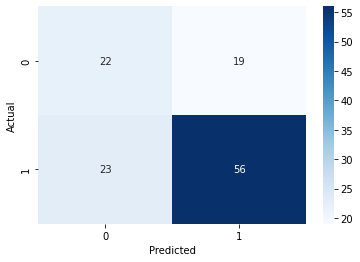

In [49]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix,cmap="Blues", annot=True)

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(y,prediction)
Y_pred_nb = nb.predict(y)

ValueError: ignored